In [40]:
#don't change this cell
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [41]:
#don't change this cell
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [42]:
#TODO
FILE_PATH = "wdbc.data"

In [43]:
#don't change this cell
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
df = pd.read_csv(FILE_PATH, header=None, names=column_names, usecols=range(1, 32))

df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

df.describe()

,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [44]:
# don't change this cell
X = df.drop(columns=["Diagnosis"]).values
y = df["Diagnosis"].values

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

########normalaizing data
scaler = StandardScaler()

X_train_np = X_train.numpy()
X_test_np  = X_test.numpy()

scaler.fit(X_train_np) 
X_train_scaled_np = scaler.transform(X_train_np)
X_test_scaled_np  = scaler.transform(X_test_np)

X_train = torch.tensor(X_train_scaled_np, dtype=torch.float32)
X_test  = torch.tensor(X_test_scaled_np,  dtype=torch.float32)
#######################

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [45]:
#TODO
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [46]:
#TODO
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 20)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(20, 10)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [47]:
#TODO
input_size = 30  # 30 features
model = MLP(input_size).to(device)

criterion = nn.BCELoss() # binary classification
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)
NUM_EPOCHS = 50

In [ ]:
train_accuracy_list= []
test_accuracy_list= []

for epoch in range(NUM_EPOCHS):
    model.train()
    total = 0
    corrects = 0
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)  # accumulate sum of loss
        total += labels.size(0)
        predicted = (outputs > 0.5).float()  # threshold
        corrects += (predicted == labels).sum().item()

    accuracy = corrects / total
    train_accuracy_list.append(accuracy)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, "
          f"Loss: {(running_loss / total):.4f}, "
          f"Accuracy: {accuracy:.4f}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)

            predicted = (outputs > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    test_accuracy_list.append(accuracy)
    print(f"Test Accuracy: {accuracy:.4f}\n")

Epoch 1/50, Loss: 0.6858, Accuracy: 0.5363
Test Accuracy: 0.7193

Epoch 2/50, Loss: 0.6504, Accuracy: 0.6879
Test Accuracy: 0.6667

Epoch 3/50, Loss: 0.5983, Accuracy: 0.6725
Test Accuracy: 0.6754

Epoch 4/50, Loss: 0.5325, Accuracy: 0.6879
Test Accuracy: 0.7456

Epoch 5/50, Loss: 0.4596, Accuracy: 0.7692
Test Accuracy: 0.8070

Epoch 6/50, Loss: 0.3887, Accuracy: 0.8725
Test Accuracy: 0.9298

Epoch 7/50, Loss: 0.3208, Accuracy: 0.9077
Test Accuracy: 0.9649

Epoch 8/50, Loss: 0.2571, Accuracy: 0.9319
Test Accuracy: 0.9561

Epoch 9/50, Loss: 0.2083, Accuracy: 0.9495
Test Accuracy: 0.9649

Epoch 10/50, Loss: 0.1728, Accuracy: 0.9560
Test Accuracy: 0.9737

Epoch 11/50, Loss: 0.1467, Accuracy: 0.9604
Test Accuracy: 0.9737

Epoch 12/50, Loss: 0.1300, Accuracy: 0.9604
Test Accuracy: 0.9737

Epoch 13/50, Loss: 0.1181, Accuracy: 0.9648
Test Accuracy: 0.9737

Epoch 14/50, Loss: 0.1084, Accuracy: 0.9670
Test Accuracy: 0.9737

Epoch 15/50, Loss: 0.1013, Accuracy: 0.9714
Test Accuracy: 0.9737

Epoc

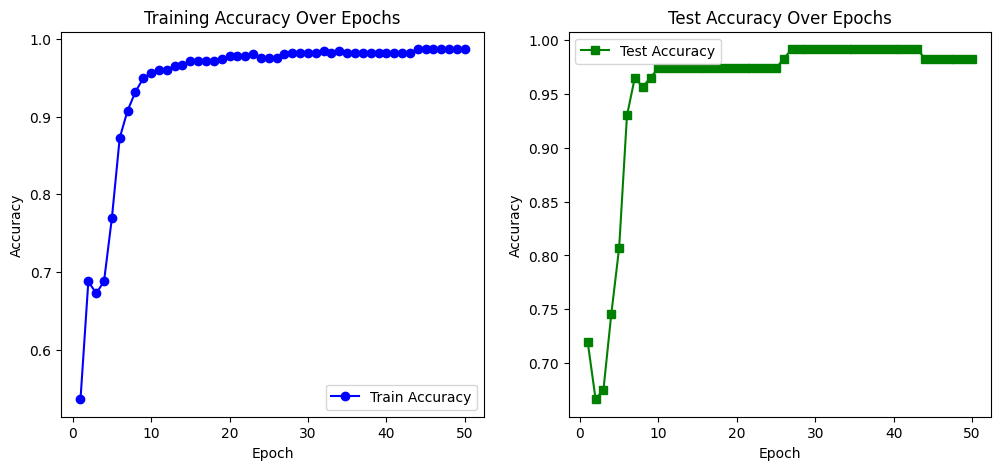

In [49]:
# don't change this cell
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, NUM_EPOCHS+1), train_accuracy_list, marker='o', linestyle='-', color='b', label="Train Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, NUM_EPOCHS+1), test_accuracy_list, marker='s', linestyle='-', color='g', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Over Epochs")
plt.legend()

plt.show()